In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
# Setup paths for local execution
import os
import sys

# Project directories
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
DATA_DIR = os.path.join(BASE_DIR, 'data')
OUTPUT_DIR = os.path.join(BASE_DIR, 'outputs')
SRC_DIR = os.path.join(BASE_DIR, 'src')

# Add src to path
sys.path.insert(0, SRC_DIR)


# Mounting drive

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
# reading file

In [7]:
data = pd.read_csv('../../data/cleaned_data.csv')

In [8]:
data.head()

,Unnamed: 0,id_var,Quantity,cumsum,cumdist,month,dow,qtr,year,dom,doy,fdom,holiday,ds
0,0,Australia_20685,2.0,2.0,0.0,6,0,2,2010,7,158,1,0,2010-06-07
1,1,Australia_20685,0.0,2.0,1.0,6,1,2,2010,8,159,1,0,2010-06-08
2,2,Australia_20685,0.0,2.0,2.0,6,2,2,2010,9,160,1,0,2010-06-09
3,3,Australia_20685,0.0,2.0,3.0,6,3,2,2010,10,161,1,0,2010-06-10
4,4,Australia_20685,0.0,2.0,4.0,6,4,2,2010,11,162,1,0,2010-06-11


# Analysis at over all level.

In [9]:
over_all = data.groupby(['ds'])['Quantity'].sum().reset_index()

In [10]:
over_all['ds'] = pd.to_datetime(over_all['ds'])

In [11]:
over_all['month'] = over_all['ds'].dt.month
over_all['dow'] = over_all['ds'].dt.dayofweek
over_all['qtr'] = over_all['ds'].dt.quarter
over_all['year'] = over_all['ds'].dt.year
over_all['dom'] = over_all['ds'].dt.day
over_all['doy'] = over_all['ds'].dt.dayofyear

# 2009 data very different from other in terms of level

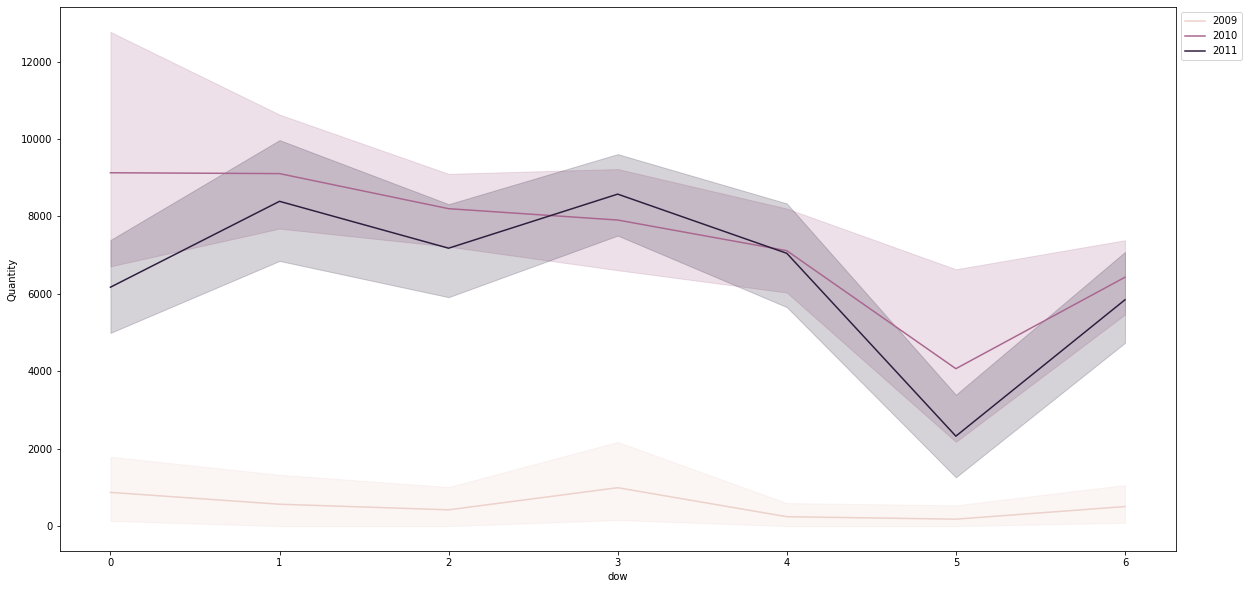

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=over_all, x="dow", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

# seems like yearly seasonality exist at over all level. it is very likely to have series at lower level follwing yearly seasonality

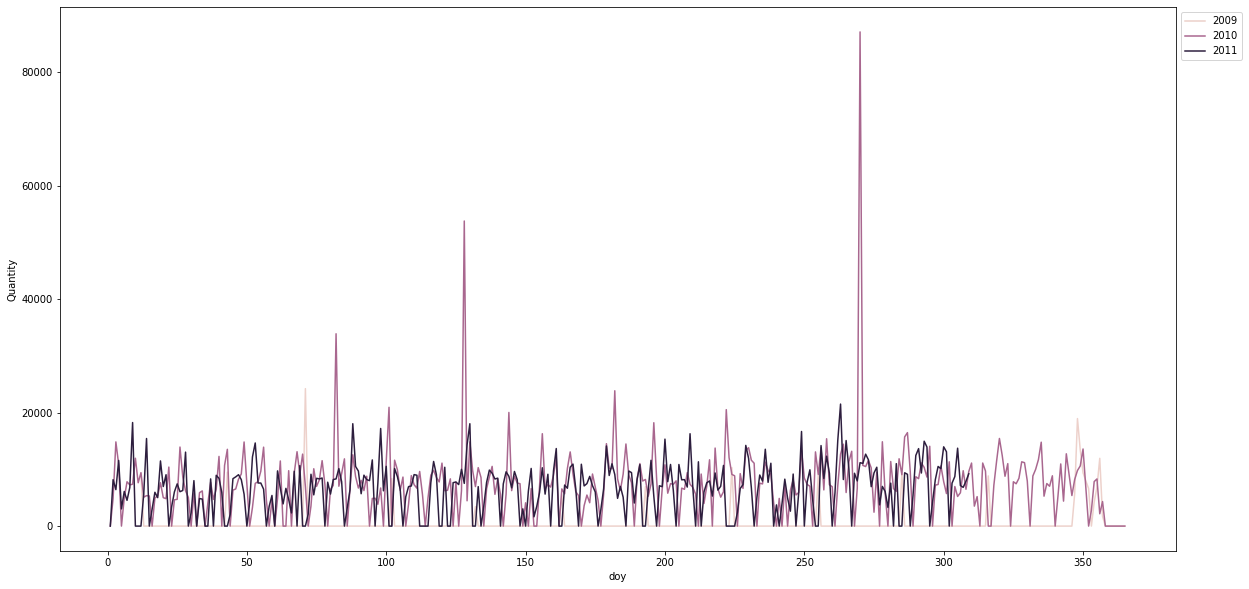

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=over_all, x="doy", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

# some monthly seasonality structure also exist at over all level

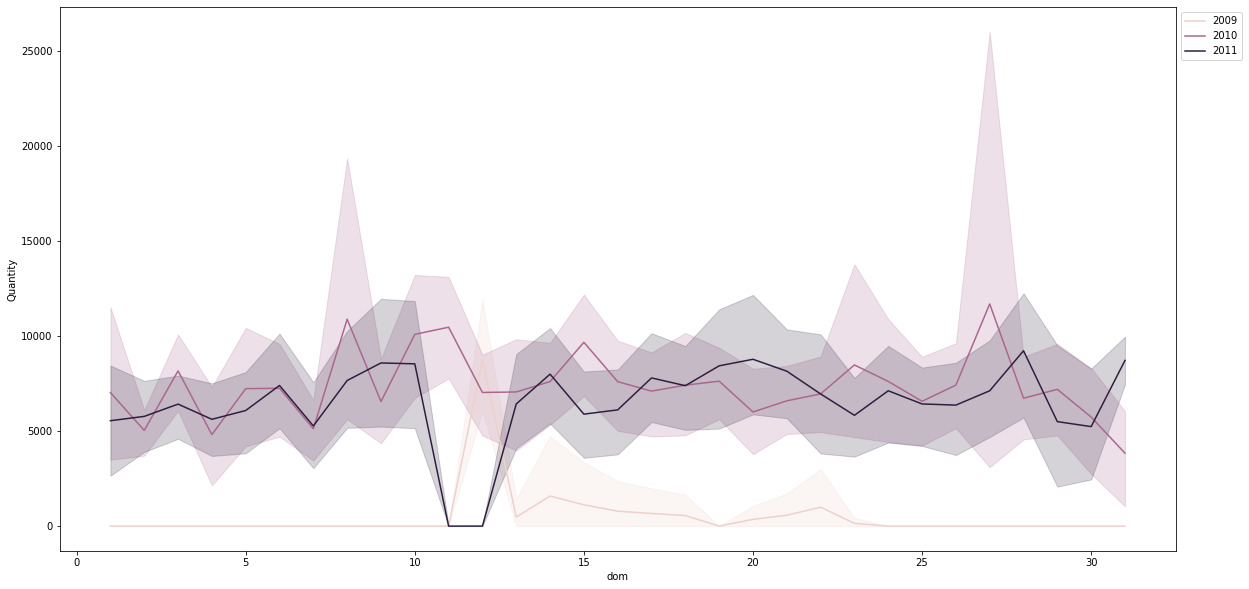

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=over_all, x="dom", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

# Analysis at over all weekly level

In [15]:
over_all['week_start'] = over_all['ds'].dt.to_period('W-Sun').dt.to_timestamp()

In [16]:
overall_week = over_all.groupby(['week_start'])['Quantity'].sum().reset_index()

In [17]:
overall_week.head()

,week_start,Quantity
0,2009-01-12,9242.345734
1,2009-01-19,0.000000
2,2009-01-26,0.000000
3,2009-02-02,0.000000
4,2009-02-09,9515.602277


In [18]:
overall_week['week_no'] = overall_week['week_start'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [19]:
def weekinmonth(x):
  x = pd.to_datetime(x)
  fdom = x.day // 7
  return fdom
overall_week['wom'] = overall_week['week_start'].apply(weekinmonth)

In [20]:
overall_week['year'] = overall_week['week_start'].dt.year

# Some week of month factor

ValueError: ignored

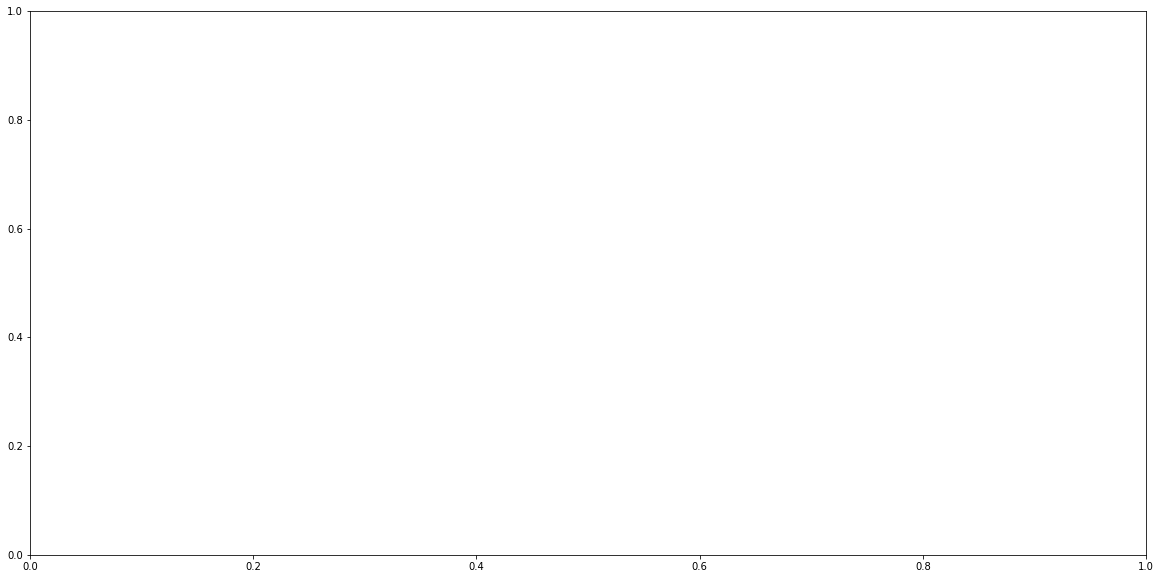

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=overall_week, x="wom", y="Quantity", hue="StockCode",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Seasonality at yearly level

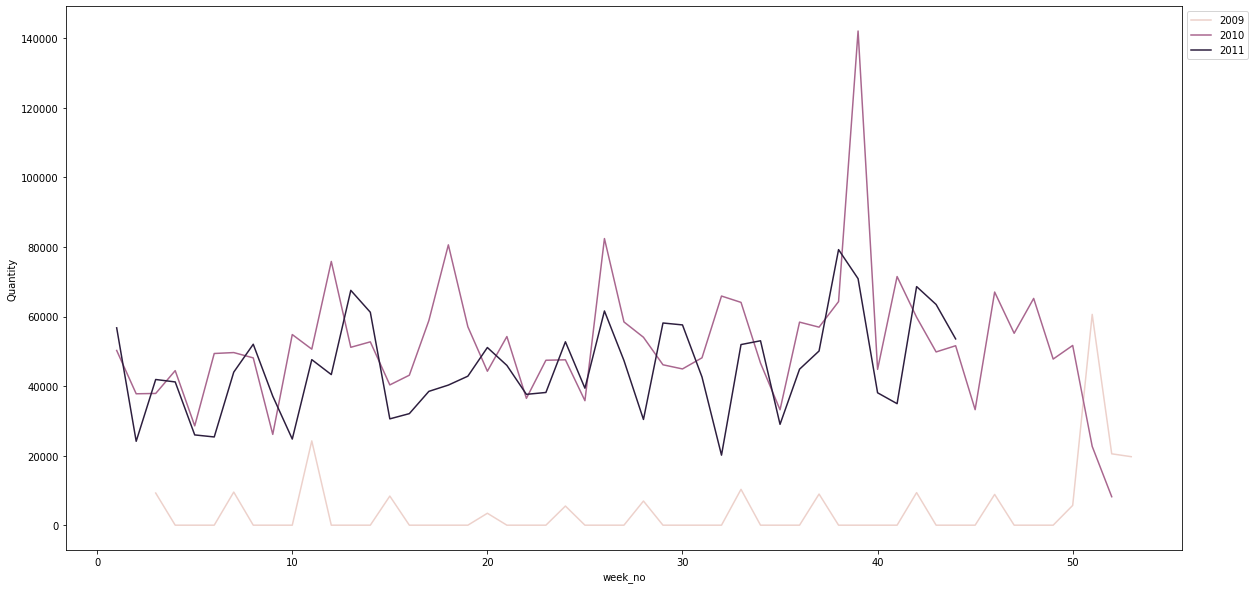

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=overall_week, x="week_no", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Analysis by stock 

##### at daily level

In [23]:
country_stock = data['id_var'].str.split('_',n=1,expand=True)

In [24]:
data['Country'] = country_stock[0]
data['StockCode']= country_stock[1]

In [25]:
stock = data.groupby(['StockCode','ds'])['Quantity'].sum().reset_index()

In [26]:
stock['ds'] = pd.to_datetime(stock['ds'])

In [27]:
stock['month'] = stock['ds'].dt.month
stock['dow'] = stock['ds'].dt.dayofweek
stock['qtr'] = stock['ds'].dt.quarter
stock['year'] = stock['ds'].dt.year
stock['dom'] = stock['ds'].dt.day
stock['doy'] = stock['ds'].dt.dayofyear

### By day of Week

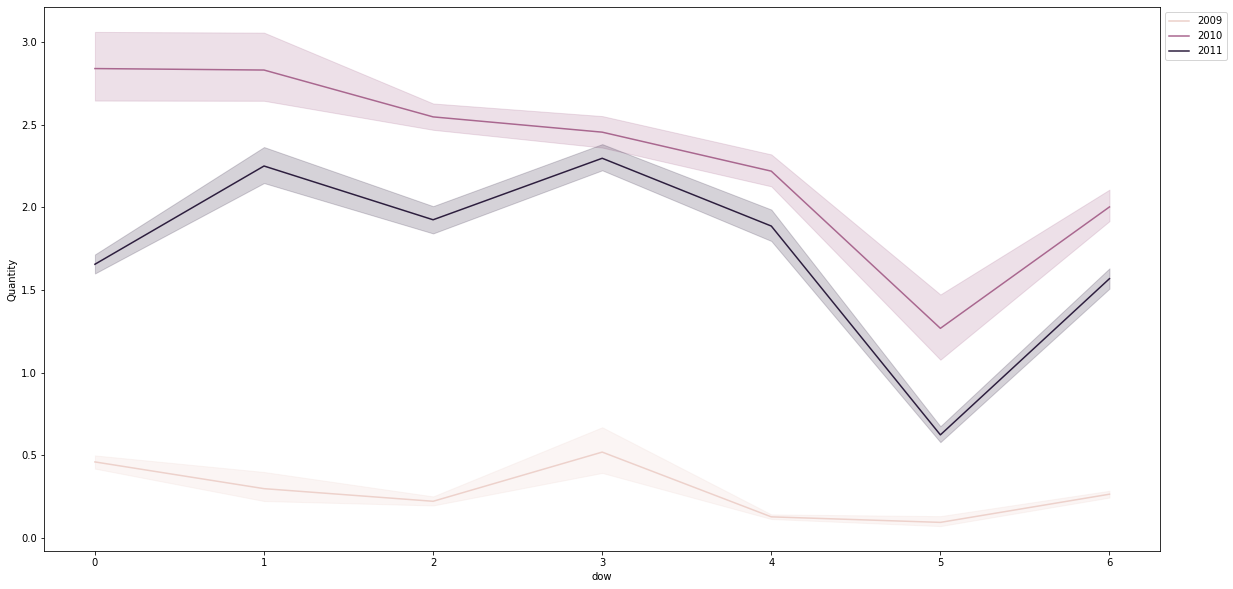

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=stock, x="dow", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

In [29]:
stock['week_start'] = stock['ds'].dt.to_period('W-Sun').dt.to_timestamp()

In [30]:
stock = stock.groupby(['StockCode','week_start'])['Quantity'].sum().reset_index()

In [31]:
stock['week_no'] = stock['week_start'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [32]:
def weekinmonth(x):
  x = pd.to_datetime(x)
  fdom = x.day // 7
  return fdom
stock['wom'] = stock['week_start'].apply(weekinmonth)

In [33]:
stock['year'] = stock['week_start'].dt.year

### By week of month

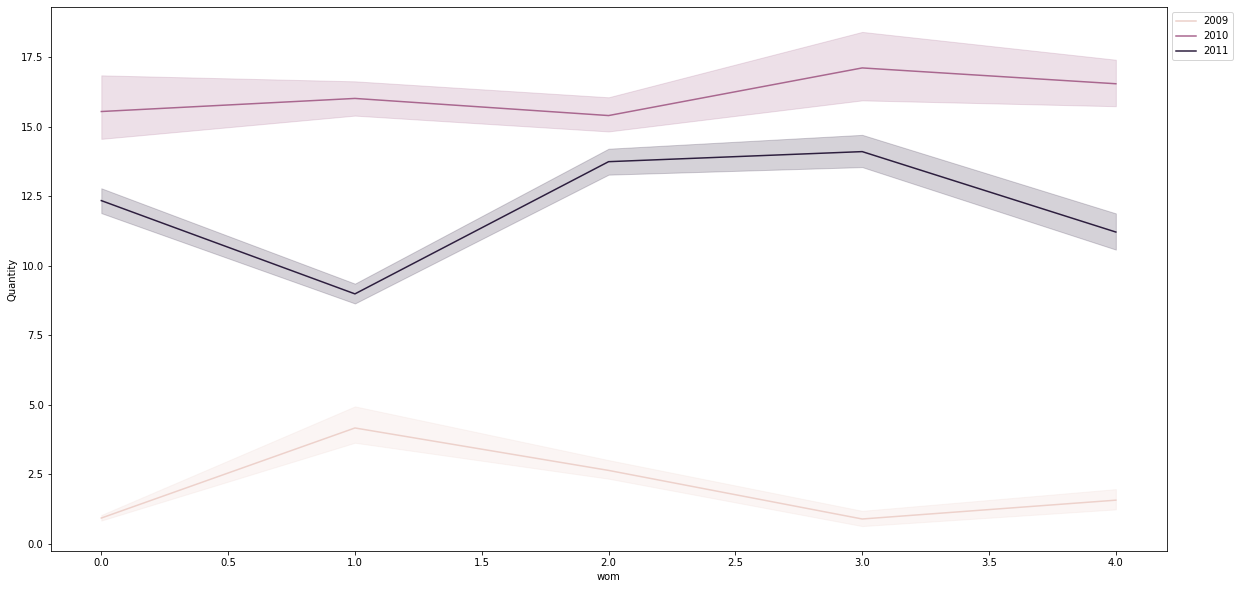

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=stock, x="wom", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

### By week no

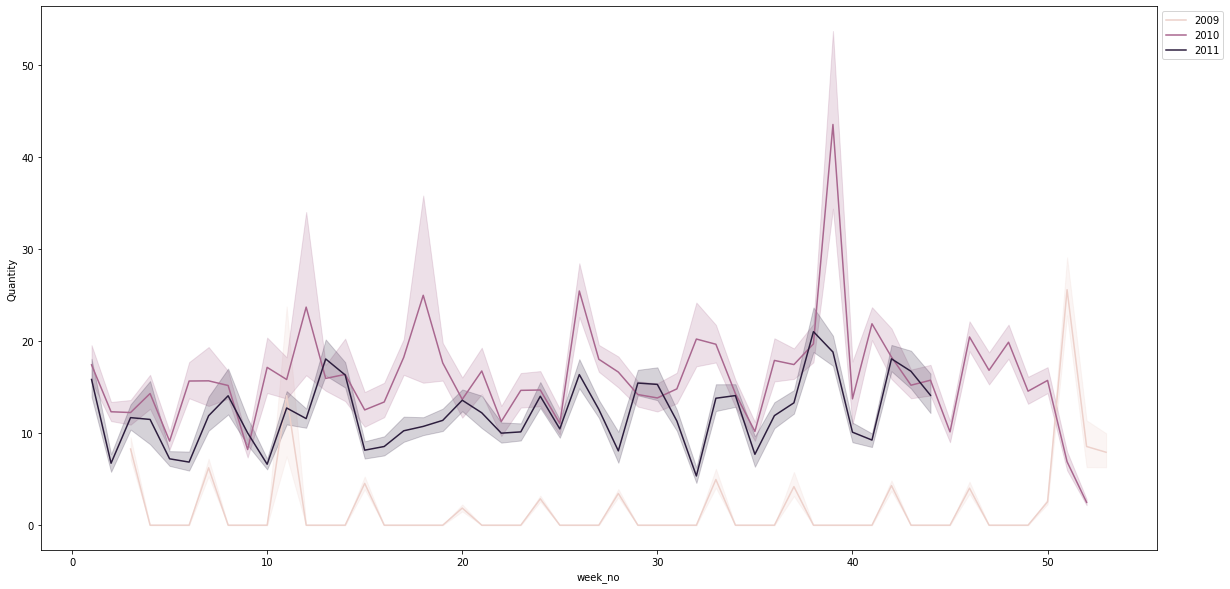

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=stock, x="week_no", y="Quantity", hue="year",ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [36]:
stock.to_csv('../../data/stock_at_weekly_level.csv')

In [37]:
def croston(ts, periods=1,alpha=0.3,beta=0.4):
  d = np.array(ts) 
  cols = len(d)
  d = np.append(d,[np.nan]*periods)
  a,p,f = np.full((3,cols+periods),np.nan)
  fo = np.argmax(d[:cols]>0)
  a[0] = d[fo]
  p[0] = 1/(1 + fo)
  f[0] = p[0]*a[0]
  for t in range(0,cols): 
    if d[t] > 0:
        a[t+1] = alpha*d[t] + (1-alpha)*a[t] 
        p[t+1] = beta*(1) + (1-beta)*p[t]  
    else:
        a[t+1] = a[t]
        p[t+1] = (1-beta)*p[t]       
    f[t+1] = p[t+1]*a[t+1]
  a[cols+1:cols+periods] = a[cols]
  p[cols+1:cols+periods] = p[cols]
  f[cols+1:cols+periods] = f[cols]
  df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Period":p,"Level":a,"Error":d-f})
  return df


In [ ]:
data['Quantity'].max()

10000.0

In [ ]:
data.drop(['Unnamed: 0','cumsum','cumdist'],axis=1,inplace=True)

In [ ]:
dc = data.groupby(['year','id_var'])['Quantity'].sum().reset_index()

In [ ]:
dc = dc.loc[((dc['year']==2011) & (dc['Quantity'] > 0)),]

In [ ]:
d = data.loc[data['id_var'].isin(dc['id_var'].unique()),]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
lplot = sns.lineplot(data=d, x="ds", y="Quantity", hue='id_var',ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2) 

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.preprocessing import StandardScaler

Quantity  ...                  
id_var     Australia_15036  ... Unspecified_85227
ds                          ...                  
2009-01-12             NaN  ...               NaN
2009-01-13             NaN  ...               NaN
2009-01-14             NaN  ...               NaN
2009-01-15             NaN  ...               NaN
2009-01-16             NaN  ...               NaN
...                    ...  ...               ...
2011-11-01             0.0  ...               0.0
2011-11-02             0.0  ...               0.0
2011-11-03             0.0  ...               0.0
2011-11-04             0.0  ...               0.0
2011-11-05             0.0  ...               0.0

[1028 rows x 19122 columns]

{'id': StandardScaler(copy=True, with_mean=True, with_std=True)}